TZ_Izpit_iz_vaj

Importi

In [40]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV


Navodila:


Tematika podatkov: Uporaba kreditnih kartic
Upravitelje bank skrbi, ker vse več strank opušča uporabo kreditnih kartic. Zato bi bilo koristno, če bi lahko iz obstoječih podatkov odkrili,
kdo namerava prenehati z uporabo kreditne kartice, da bi mu lahko ponudili boljši paket in ugodnosti, ter ga tako odvrnili od opustitve.
Podatki
V treh datotekah ( clientInfo.txt , clientActivity.xlsx , clientTransactions.csv ) se nahajajo podatki o klientih in njihovih
dejavnostih povezenih z uporabo kreditne kartice. Prva datoteka vsebuje splošne podatke o klientu, druga datoteka vsebuje podatke o
klientovih ativnostih povezanih z banko, tretja datoteka pa vsebuje podatke o klientovih transakcijah.
V pomoč pri razumevanju posameznih spremenljivk so vam lahko naslednji opisi ter vrsta podatkov (številski/kategorični
podatek):
Accaunt_Open - ali ima klient pri banki še odprt račun ('yes', 'no'): kategorični
Age - starost klienta: številski
Gender - spol klienta ('F'-ženski, 'M'-moški): kategorični
Family_Members - število vzdrževanih družinskih članov klienta: številski
Education - dosežena stopnja izobrazbe klienta ('Graduate','High School','Uneducated','College','Unknown'): kategorični
Status - kakšen je status razmerja klienta ('Married', 'Single', 'Divorced', 'Unknown'): kategorični
Income_Category - v katero kategorijo sodi klient glede na prihodek ('average', 'very low', 'high', 'low', 'very high', 'Unknown'):
kategorični
Card_Category - kateri tip kartice klient uporablja ('Blue', 'Silver', 'Gold', 'Platinum'): kategorični
Member - koliko mesecev je že klient pri izbrani banki: številski
NumServices - koliko različnih storitev banke klient uporablja: številski
Months_Inactive - koliko mesecev v zadnjem letu je bil klient neaktiven: številski
Contacts_Count - kolikokrat je klient v zadnjem letu kontaktiral banko: številski
Credit_Limit - kakšen limit ima klient na kreditni kartici: številski
MinMonthBalance - minimalno mesečno stanje klienta: številski
ChangeInTransaction - sprememba v velikosti transakcij med začetkom in koncem leta: številski
TransAmount - skupna vsota transakcij v zadnjem letu: številski
TransCount - število transakcij opravljenih v zanjem letu: številski
 Izpit iz vaj (16. 1. 2024)
V dataframe preberite vse tri datoteke s podatki: clientInfo.txt , clientActivity.xlsx in clientTransactions.csv . Vse prebrane
podatke iz datotek nato združite v en dataframe, glede na ID klienta. Indeks stolpec naj bo poimenovan ID_KLIENT.
Na dva(!) različna načina izpišite zadnje 3 vrstice tega združenega datafram-a.
izpišite koliko stolpcev in vrstic je v združenem datafram-u.
Izpišite vse podatke klienta, ki ima ID 714133158.
Izpišite prvih pet vrednosti stolpcev za četrto vrstico v datafram-u.
Izpišite koliko je posameznih unikatnih vrednosti v stolpcu Card Category.
 Naloga 1 (13 T)








In [41]:
df1=pd.read_csv("clientTransactions.csv", sep=";", index_col=0)

df2=pd.read_csv("clientInfo.txt", sep=" ", index_col=0)
df3=pd.read_excel("clientActivity.xlsx", sheet_name=0, index_col=0)

df1.index.name="ID"

df=pd.concat([df1,df2,df3],axis=1)
df1.set_axis="ID"
print(df1.index.name)
df1.head(5)

#df.head(5)

ID


,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount
ID,,,,,
768805383,12691.0,777,1.335,1144.0,42
818770008,8256.0,864,1.541,1291.0,33
713982108,3418.0,0,2.594,1887.0,20
769911858,3313.0,2517,1.405,1171.0,20
709106358,4716.0,0,2.175,816.0,28


In [42]:
df2.head(5)


,Accaunt_Open,Age,Gender,Family_Members,Education,Status
ID,,,,,,
768805383,yes,45,M,3,High School,Married
818770008,yes,49,F,5,Graduate,Single
713982108,yes,51,M,3,Graduate,Married
769911858,yes,40,F,4,High School,Unknown
709106358,yes,40,M,3,Uneducated,Married


In [43]:
df3.head(5)

,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count
ID,,,,,,
768805383,average,Blue,39,5,1,3.0
818770008,very low,Blue,44,6,1,2.0
713982108,high,Blue,36,4,1,NaN
769911858,very low,Blue,34,3,4,1.0
709106358,average,Blue,21,5,1,NaN


In [65]:
df.dtypes

Credit_Limit           float64
MinMonthBalance          int64
ChangeInTransaction    float64
TransAmount            float64
TransCount               int64
Accaunt_Open            object
Age                      int64
Gender                  object
Family_Members           int64
Education               object
Status                  object
Income_Category         object
Card_Category           object
Member                   int64
NumServices              int64
Months_Inactive          int64
Contacts_Count         float64
dtype: object

In [44]:
df.rename(columns={"ID": "ID_KLIENT"})

df.head(5)


,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount,Accaunt_Open,Age,Gender,Family_Members,Education,Status,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count
ID,,,,,,,,,,,,,,,,,
768805383,12691.0,777,1.335,1144.0,42,yes,45,M,3,High School,Married,average,Blue,39,5,1,3.0
818770008,8256.0,864,1.541,1291.0,33,yes,49,F,5,Graduate,Single,very low,Blue,44,6,1,2.0
713982108,3418.0,0,2.594,1887.0,20,yes,51,M,3,Graduate,Married,high,Blue,36,4,1,NaN
769911858,3313.0,2517,1.405,1171.0,20,yes,40,F,4,High School,Unknown,very low,Blue,34,3,4,1.0
709106358,4716.0,0,2.175,816.0,28,yes,40,M,3,Uneducated,Married,average,Blue,21,5,1,NaN


In [45]:
df.tail(3)


,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount,Accaunt_Open,Age,Gender,Family_Members,Education,Status,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count
ID,,,,,,,,,,,,,,,,,
716506083,5409.0,0,0.819,10291.0,60,no,44,F,1,High School,Married,very low,Blue,36,5,3,4.0
717406983,5281.0,0,0.535,8395.0,62,no,30,M,2,Graduate,Unknown,low,Blue,36,4,3,3.0
714337233,10388.0,1961,0.703,10294.0,61,no,43,F,2,Graduate,Married,very low,Silver,25,6,2,4.0


In [99]:
df.iloc[-3:]

,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount,Accaunt_Open,Age,Gender,Family_Members,Education,Status,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count
ID,,,,,,,,,,,,,,,,,
716506083,5409.0,0,0.819,10291.0,60,no,44,F,1,High School,Married,very low,Blue,36,5,3,4.0
717406983,5281.0,0,0.535,8395.0,62,no,30,M,2,Graduate,Unknown,low,Blue,36,4,3,3.0
714337233,10388.0,1961,0.703,10294.0,61,no,43,F,2,Graduate,Married,very low,Silver,25,6,2,4.0


In [47]:
df.shape

(10127, 17)

In [48]:
print(df.loc[714133158])

KeyError: "None of ['ID'] are in the columns"

Izrišite graf korelacij med vsemi številskimi stolpci.
Izrišite graf, ki bo prikazoval koliko klientov je v kakšni vrsti razmerja (poročen, ločen, ...).
Izrišite graf, ki bo prikazoval povprečno koliko mesecev je že klient pri izbrani banki, glede na vrsto kartice, ki jo ima
(Card_Category). Upoštevajte samo kliente, ki imajo še vedno odprt račun.
Kakšen je povprečen limit klientov na kreditni kartici glede na doseženo stopnjo izobrazbe? Povprečen limit zaokrožite na celo
število in ga sortirajte od najmanjšega do največjega.
Koliko klientov ima doktorat ali univerzitetno izobrazbo?
Koliko klientov je v zadnjem letu kontaktiralo banko večkrat, kot so to v povprečju storili ostali klienti?
 Naloga 2 (20 T)


In [104]:
kontakt=df["Contacts_Count"].mean()
print(kontakt)

kontvec=df["Contacts_Count"]>kontakt
kontvec.head()
print(kontvec.groupBy)

2.459202848382949


AttributeError: 'Series' object has no attribute 'groupBy'

<Axes: ylabel='ID'>

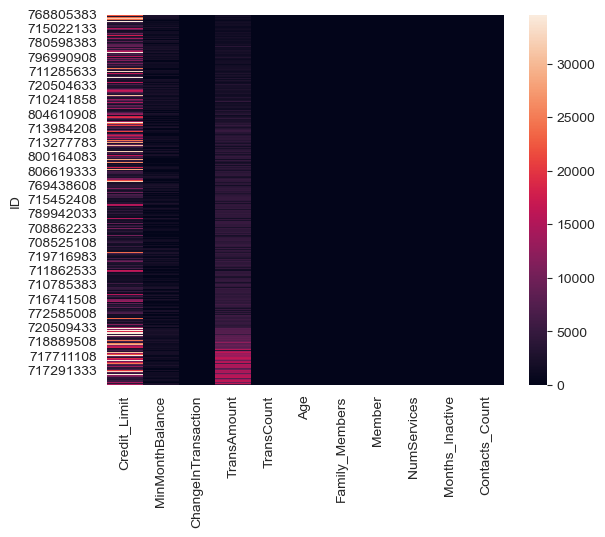

In [86]:
stev=df.select_dtypes(include=['int64',"float64"])
sns.heatmap(stev)

In [90]:
print(razmerje)
razmerjeM=df(df["Status"]=="Married").sum()

razmerjeS=df(df["Status"]=="Single").sum()
razmerjeD=df(df["Status"]=="Divorced").sum()
razmerjeU=df(df["Status"]=="Unknown").sum()
razmerje={razmerjeM,razmerjeS,razmerjeD,razmerjeU}

sns.barplot(razmerje)

ID
768805383     Married
818770008      Single
713982108     Married
769911858     Unknown
709106358     Married
               ...   
772366833      Single
710638233    Divorced
716506083     Married
717406983     Unknown
714337233     Married
Name: Status, Length: 10127, dtype: object


TypeError: 'DataFrame' object is not callable

In [94]:
df.head(50)

,Credit_Limit,MinMonthBalance,ChangeInTransaction,TransAmount,TransCount,Accaunt_Open,Age,Gender,Family_Members,Education,Status,Income_Category,Card_Category,Member,NumServices,Months_Inactive,Contacts_Count
ID,,,,,,,,,,,,,,,,,
768805383,12691.0,777,1.335,1144.0,42,yes,45,M,3,High School,Married,average,Blue,39,5,1,3.000000
818770008,8256.0,864,1.541,1291.0,33,yes,49,F,5,Graduate,Single,very low,Blue,44,6,1,2.000000
713982108,3418.0,0,2.594,1887.0,20,yes,51,M,3,Graduate,Married,high,Blue,36,4,1,2.459203
769911858,3313.0,2517,1.405,1171.0,20,yes,40,F,4,High School,Unknown,very low,Blue,34,3,4,1.000000
709106358,4716.0,0,2.175,816.0,28,yes,40,M,3,Uneducated,Married,average,Blue,21,5,1,2.459203
713061558,4010.0,1247,1.376,1088.0,24,yes,44,M,2,Graduate,Married,low,Blue,36,3,1,2.000000
810347208,34516.0,2264,1.975,1330.0,31,yes,51,M,4,Unknown,Married,very high,Gold,46,6,1,3.000000
818906208,29081.0,1396,2.204,1538.0,36,yes,32,M,0,High School,Unknown,average,Silver,27,2,2,2.000000
710930508,22352.0,2517,3.355,1350.0,24,yes,37,M,3,Uneducated,Single,average,Blue,36,5,2,2.459203


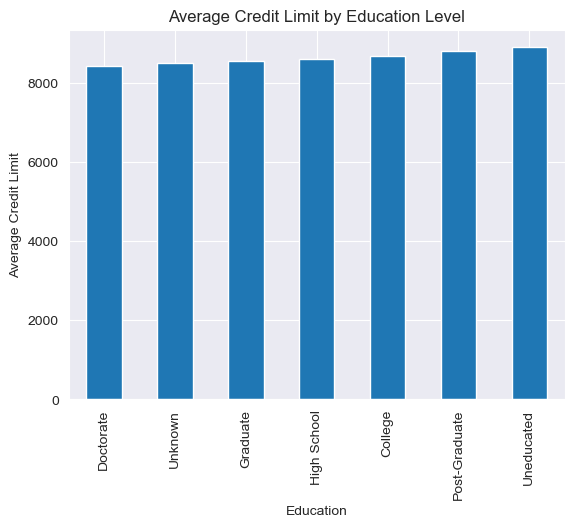

In [96]:
average_credit_limit = df.groupby('Education')['Credit_Limit'].mean().round().sort_values()
plt.figure()
average_credit_limit.plot(kind='bar')
plt.title("Average Credit Limit po izob.")
plt.ylabel("Average Credit Limit")
plt.show()

In [95]:
dfG=df[df["Education"]=="College"].sum()
dfD=df[df["Education"]=="Doctorate"].sum()
print(dfG+dfD)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Izpišite koliko je manjkajočih podatkov v posameznih stolpcih.
Nato manjkajoče podatke iz stolpcev zapolnite s sledečo strategijo:
Contacts_Count zapolnite s povprečno vrednostjo stolpca
Card_Category zapolnite z najpogosteje pojavljeno vrednostjo stolpca
Credit_Limit zapolnite z vrednostjo 0
TransAmount zapolnite tako da ChangeInTransaction pomnožite s 1000 (TA=CiTx1000).
Ponovno izpišite koliko je manjkajočih vrednosti samo za te štiri stolpce.
 Naloga 3 (5 T)

In [49]:
df.isna().sum()

Credit_Limit            8
MinMonthBalance         0
ChangeInTransaction     0
TransAmount             6
TransCount              0
Accaunt_Open            0
Age                     0
Gender                  0
Family_Members          0
Education               0
Status                  0
Income_Category         0
Card_Category          20
Member                  0
NumServices             0
Months_Inactive         0
Contacts_Count         16
dtype: int64

In [50]:
avg=df["Contacts_Count"].mean()
df["Contacts_Count"]=df["Contacts_Count"].fillna(avg)
df.isna().sum()

Credit_Limit            8
MinMonthBalance         0
ChangeInTransaction     0
TransAmount             6
TransCount              0
Accaunt_Open            0
Age                     0
Gender                  0
Family_Members          0
Education               0
Status                  0
Income_Category         0
Card_Category          20
Member                  0
NumServices             0
Months_Inactive         0
Contacts_Count          0
dtype: int64

In [51]:
najpogosteje=df["Card_Category"].value_counts().idxmax()
print(najpogosteje)
df["Card_Category"]=df["Card_Category"].fillna(najpogosteje)
df.isna().sum()

Blue


Credit_Limit           8
MinMonthBalance        0
ChangeInTransaction    0
TransAmount            6
TransCount             0
Accaunt_Open           0
Age                    0
Gender                 0
Family_Members         0
Education              0
Status                 0
Income_Category        0
Card_Category          0
Member                 0
NumServices            0
Months_Inactive        0
Contacts_Count         0
dtype: int64

In [52]:
df["Credit_Limit"]=df["Credit_Limit"].fillna(0)
df.isna().sum()

Credit_Limit           0
MinMonthBalance        0
ChangeInTransaction    0
TransAmount            6
TransCount             0
Accaunt_Open           0
Age                    0
Gender                 0
Family_Members         0
Education              0
Status                 0
Income_Category        0
Card_Category          0
Member                 0
NumServices            0
Months_Inactive        0
Contacts_Count         0
dtype: int64

In [53]:
df["TransAmount"]=df["TransAmount"].fillna(df["ChangeInTransaction"]*1000)
df.isna().sum()

Credit_Limit           0
MinMonthBalance        0
ChangeInTransaction    0
TransAmount            0
TransCount             0
Accaunt_Open           0
Age                    0
Gender                 0
Family_Members         0
Education              0
Status                 0
Income_Category        0
Card_Category          0
Member                 0
NumServices            0
Months_Inactive        0
Contacts_Count         0
dtype: int64

Ustvarite dve kopiji datafram-a dfRegresija in dfKlasifikacija :
dfKlasifikacija je dataframe, ki ga boste uporabili za klasifikacijo, in sicer boste napovedovali ali ima klient pri banki še
odprt račun (Accaunt_Open).
dfRegresija je dataframe, ki ga boste uporabili za regresijo, in sicer boste napovedovali število transakcij (TransCount).
Podatke v obeh dataframih ustrezno predprocesirajte(!) - kategorične vrednosti pretvorite v dummy vrednosti, številske pa
standardizirajte.
Izpišite prvih 5 vrstic iz vsakega dataframa.
 Naloga 4 (10 T)

In [66]:
dfRegresija=df.copy()
dfKlasifikacija=df.copy()
dfKlasifikacija.dtypes

Credit_Limit           float64
MinMonthBalance          int64
ChangeInTransaction    float64
TransAmount            float64
TransCount               int64
Accaunt_Open            object
Age                      int64
Gender                  object
Family_Members           int64
Education               object
Status                  object
Income_Category         object
Card_Category           object
Member                   int64
NumServices              int64
Months_Inactive          int64
Contacts_Count         float64
dtype: object

In [71]:


katR = dfRegresija.select_dtypes(include='object').columns         
katK = dfRegresija.select_dtypes(include='object').columns
katK = katK.drop('Accaunt_Open')



print(pd.get_dummies(dfKlasifikacija[katK]))
print(pd.get_dummies(dfRegresija[katR]))

stR=dfRegresija.select_dtypes(exclude="object").columns

stK=dfKlasifikacija.select_dtypes(exclude="object").columns
stR=stR.drop("TransCount")
dfRegresija[stR]=StandardScaler().fit_transform(dfRegresija[stR])
dfKlasifikacija[stK]=StandardScaler().fit_transform(dfKlasifikacija[stK])



KeyError: "None of [Index(['Gender', 'Education', 'Status', 'Income_Category', 'Card_Category'], dtype='object')] are in the [columns]"

Kot prvo boste s pomočjo klasifikacije poskušali napovedati ali bo nekdo pustil odprt račun ali ga bo zaprl (uporabite podatke iz
dfKlasifikacija ). Izhodni podatek je tako znan, iz vhodnih podatkov pa odstranite še 'MinMonthBalance' in 'Credit_Limit'. Ker ne vemo
kateri klasifikator bi bil tu najboljši preizkusite tri: naključni gozd, k-najbližjih sosedov in logistično regresijo.
Podatke razdelite na učno in testno množico s pomočjo stratificirane navzkrižne validacije s šestimi rezi. Za vsak algoritem merite
točnost njegove napovedi.
Izrišite graf, ki bo pregledno prikazoval povprečno točnost posameznega klasifikatorja.
 Naloga 5 (12 T)

In [73]:
dfKlasifikacija.head()

,Gender_F,Gender_M,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Status_Divorced,...,Income_Category_Unknown,Income_Category_average,Income_Category_high,Income_Category_low,Income_Category_very high,Income_Category_very low,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
ID,,,,,,,,,,,,,,,,,,,,,
768805383,False,True,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
818770008,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
713982108,False,True,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
769911858,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
709106358,False,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False


In [80]:
dfKlasifikacija1=df.copy()
dfKlasifikacija.head

<bound method NDFrame.head of            Gender_F  Gender_M  Education_College  Education_Doctorate  \
ID                                                                      
768805383     False      True              False                False   
818770008      True     False              False                False   
713982108     False      True              False                False   
769911858      True     False              False                False   
709106358     False      True              False                False   
...             ...       ...                ...                  ...   
772366833     False      True              False                False   
710638233     False      True              False                False   
716506083      True     False              False                False   
717406983     False      True              False                False   
714337233      True     False              False                False   

           Education

In [85]:
from sklearn.linear_model import LogisticRegression

#dfKlasifikacija1=df.copy()
izhod="Accaunt_Open"

vhod=dfKlasifikacija.drop(["Accaunt_Open"],axis=1)


cv=StratifiedKFold(n_splits=6)
cv.get_n_splits(vhod,izhod)

forest = RandomForestClassifier(random_state=0)
forest.fit(cv)
print(cv.get_n_splits(vhod,izhod))
""" 

StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(cv.split(vhod, izhod)):
     print(f"Fold {i}:")
     print(f"  Train: index={train_index}")
     print(f"  Test:  index={test_index}")

X_train, X_test, y_train, y_test = train_test_split(    vhod, izhod, test_size=0.33, random_state=42)
     """
Neighbors=KNeighborsClassifier(n_neighbors=3)
Logistic=LogisticRegression()
Neighbors.fit()
Logistic.fit()

algo=["Logistic","KNeighbors","forest"]
score=[Logistic.score(vhod,izhod),Neighbors.score(vhod,izhod),forest.score(vhod,izhod) ]


sns.distplot(x=algo, y=score)

najbolsi=


TypeError: BaseForest.fit() missing 1 required positional argument: 'y'

Za algoritem, ki se je v nalogi 5 najbolje izkazal poiščite najboljše nastavitve parametrov s pomočjo naključnega iskanja
(RandomizedSearchCV), ki ga omejite na 10 iteracij. Poiskati morate najboljše vrednosti za vsaj dva različna parametra. Pri vsakem
parametru naj ima algoritem možnost izbirati vsaj med tremi vrednostmi. Vhodni in izhodni podatki, ter delitev na folde, naj ostane
enaka kot pri 5. nalogi.
Izpišite najboljšo doseženo točnost in vrednosti parametrov, ki so pripomogle k temu rezultatu.
 Naloga 6 (10 T)

S pomočjo regresija poskusite napovedati število transakcij, ki jih bo klient opravil v enem letu (TransCount), za podatke pa uporabite
dataframe dfRegresija . Iz vhodnih podatkov izpustite tudi podatek NumServices. Model učite na 80% vseh podatkov. Naključno stanje
naj bo 789. Za regresor uporabite linearno regresijo.
Kako dobro se je naučil model ocenite s povprečno absolutno napako.
 Naloga 7 (10 T)

Za konec naredite še gručenje nad enakim datasetom, kot ste ga uporabili za regresijo. Podatke transformirajte s pomočjo PCA
dekompozicije. Kot algoritem gručenja uporabite Birch.
Da boste lažje določili optimalno število gruč, v katere boste delili podatke izrišite dendrogram in to število nato uporabite v
algoritmu gručenja.
Izrišite graf, v katerem prikažete transformirane podatke, ki so obarvani glede na gručo, v katero so razvrščeni.
 Naloga 8 (10 T)